In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Import data
gene_data = pd.read_csv("../cs229Project/data/gene_expression.csv")

In [3]:
# clinical = pd.read_csv("../cs229Project/data/clinical.csv")
clin_to_import = ["cohort", "type_cancer_3"]
clinical = pd.read_csv("../cs229Project/data/clinical.csv", usecols = clin_to_import) 

In [4]:
clinical['y'] = clinical['type_cancer_3'].apply(lambda x: 0 if x == 'CO' else 1)
# clinical

In [90]:
merge = clinical[['cohort', 'y']].join(gene_data.T)
merge_y = merge['y']
merge_x = merge.drop(columns=['cohort','y'])
merge_x = merge_x[:,-32]
merge_x

TypeError: unhashable type: 'slice'

In [6]:
train_set, test_set = train_test_split(merge, test_size=0.2, random_state=77, stratify=merge.get('cohort').values)

In [7]:
train_set.groupby('cohort').size()

cohort
1    122
2    230
dtype: int64

In [8]:
test_set.groupby('cohort').size()

cohort
1    30
2    58
dtype: int64

In [9]:
y_train = train_set['y']
x_train = train_set.drop(columns = ['cohort', 'y'])
x_train

,cg00009553,cg00017475,cg00018539,cg00019576,cg00019778,cg00027650,cg00039016,cg00040423,cg00042568,cg00049475,...,Macrophages.M2,Dendritic.cells.resting,Dendritic.cells.activated,Mast.cells.resting,Mast.cells.activated,Eosinophils,Neutrophils,P.value,Correlation,RMSE
NS047BC,0.364551,0.837109,0.866511,0.882094,0.045116,0.626384,0.821088,0.041608,0.129566,0.813178,...,0.000000,0.210559,0.067885,0.054929,0.000000,0.000000,0.027933,0.00,0.285122,0.974674
NS007BC,0.265829,0.822958,0.831262,0.755286,0.048733,0.696751,0.860567,0.040988,0.106027,0.838433,...,0.000000,0.237989,0.036224,0.058870,0.000000,0.005328,0.034056,0.00,0.293044,0.975166
E028BC,0.612027,0.889197,0.852238,0.947260,0.046290,0.602360,0.861875,0.052118,0.099170,0.795960,...,0.000000,0.066424,0.000000,0.000000,0.064095,0.000000,0.027667,0.00,0.282364,0.998295
E065LY,0.588491,0.882635,0.876857,0.980611,0.038022,0.617290,0.872348,0.042892,0.096497,0.811616,...,0.000000,0.227663,0.063816,0.062278,0.000000,0.000000,0.000000,0.01,0.198838,1.011432
NS068BC,0.312780,0.820930,0.873718,0.759489,0.047778,0.655820,0.864674,0.037840,0.082471,0.847603,...,0.000000,0.286337,0.000000,0.064478,0.000000,0.000000,0.024663,0.00,0.257843,0.990453
NS014BC,0.357521,0.836657,0.827337,0.830815,0.046225,0.657383,0.842168,0.040988,0.102787,0.806090,...,0.000000,0.095960,0.000000,0.063111,0.000000,0.000000,0.013783,0.00,0.436246,0.915067
NS050LY,0.558741,0.837642,0.907960,0.983875,0.044077,0.572022,0.859544,0.049995,0.119900,0.793472,...,0.000000,0.132658,0.114424,0.072954,0.000000,0.000000,0.001993,0.00,0.292433,0.973318
NS268LY,0.533214,0.866841,0.840147,0.960910,0.043166,0.636662,0.863426,0.038453,0.106998,0.761257,...,0.000000,0.194939,0.090513,0.087593,0.000000,0.000000,0.054767,0.00,0.264893,0.982476
NS420LY,0.583788,0.857103,0.828519,0.892530,0.048828,0.642147,0.859735,0.038620,0.082749,0.794730,...,0.000000,0.202829,0.122480,0.042853,0.000000,0.000000,0.018571,0.01,0.197385,1.009218
NS055BC,0.376048,0.807653,0.820776,0.921542,0.055823,0.520671,0.888653,0.044686,0.107130,0.825862,...,0.000000,0.171614,0.045747,0.073396,0.000000,0.000000,0.070684,0.00,0.258966,0.984869


In [10]:
y_test = test_set['y']
x_test = test_set.drop(columns = ['cohort', 'y'])
x_test.shape

(88, 3853)

In [11]:
#KNN classification 
k_vals = range(1,351,2)
stats = []
for i in k_vals:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train.values, y_train.values)
    y_predicted = model.predict(x_test.values)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
    #sensitivity = recall
    s = tp / (tp+fn)
    #specificity
    sp = tn / (tn+fp)
    #accuracy
    a = (tp+tn) / (tp+tn+fp+fn)
    #precision = positive predictive value
    p = tp / (tp+fp)
    #f1-score
    f1 = (2*tp)/ (2*tp + fp + fn)
    stats.append([i, tn, fp, fn, tp, s, sp, a, p, f1])
#     print(stats)
#     print(f"Accuracy for {i} neighbors: {round(100*metrics.accuracy_score(y_test, y_predicted),2)} %")

In [12]:
np_stats = np.array(stats)
np_stats

array([[  1.        ,  21.        ,  27.        , ...,   0.52272727,
          0.48076923,   0.54347826],
       [  3.        ,  24.        ,  24.        , ...,   0.53409091,
          0.4893617 ,   0.52873563],
       [  5.        ,  24.        ,  24.        , ...,   0.53409091,
          0.4893617 ,   0.52873563],
       ...,
       [345.        ,   0.        ,  48.        , ...,   0.45454545,
          0.45454545,   0.625     ],
       [347.        ,   0.        ,  48.        , ...,   0.45454545,
          0.45454545,   0.625     ],
       [349.        ,   0.        ,  48.        , ...,   0.45454545,
          0.45454545,   0.625     ]])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

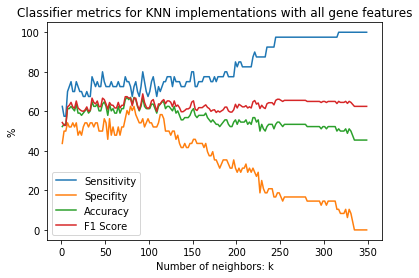

In [14]:
plt.plot(np_stats[:,0], 100*np_stats[:,5], label="Sensitivity")
plt.plot(np_stats[:,0], 100*np_stats[:,6], label="Specifity")
plt.plot(np_stats[:,0], 100*np_stats[:,7], label="Accuracy")
plt.plot(np_stats[:,0], 100*np_stats[:,9], label="F1 Score")
plt.xlabel("Number of neighbors: k")
plt.ylabel("%")
plt.title("Classifier metrics for KNN implementations with all gene features")
# plt.xlim((0,100))
plt.legend()

(0, 1)

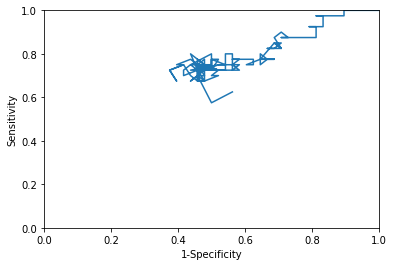

In [15]:
plt.plot(np.subtract(1,np_stats[:,6]), np_stats[:,5])
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.xlim((0,1))
plt.ylim((0,1))

In [16]:
top5k_acc = np.argpartition(np_stats[:,7], -5)[-5:]
print(np_stats[top5k_acc,0])
print(np_stats[top5k_acc,7])


[77. 93. 79. 75. 83.]
[0.65909091 0.67045455 0.67045455 0.67045455 0.67045455]


In [17]:
top5k_f1 = np.argpartition(np_stats[:,9], -5)[-5:]
print(np_stats[top5k_f1,0])
print(np_stats[top5k_f1,9])

[47. 73. 35. 75. 93.]
[0.66666667 0.67391304 0.66666667 0.6741573  0.68817204]


In [ ]:
# ! pip install mlxtend


# # for k in np_stats[top5k_acc, 0]:
# knn = KNeighborsClassifier(n_neighbors=35)
# sfs1 = SFS(knn, 
#        k_features=10,#round(merge_x.shape[1]/10), 
#        forward=True, 
#        floating=False, 
#        verbose=2,
#        scoring='accuracy',
#        cv=0)
# sfs1 = sfs1.fit(merge_x, merge_y)
# print(sfs1.subsets_)

NameError: name 'datasets' is not defined

<BarContainer object of 3853 artists>

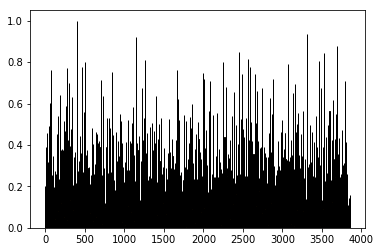

In [18]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile = 10)
selector.fit(merge_x, merge_y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
X_indices = np.arange(merge_x.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [19]:
selector = SelectPercentile(f_classif, percentile = 10)
selector.fit(x_train, y_train)
train_x_p10 = selector.transform(x_train)
test_x_p10 = selector.transform(x_test)

print("old shape: " + str(x_train.shape))
print("new shape: " + str(train_x_p10.shape))
print("label train shape:" + str(y_train.values.shape))

old shape: (352, 3853)
new shape: (352, 386)
label train shape:(352,)


In [20]:
stats_knn_p10 = []
for i in range(1,100,2):
    model = KNeighborsClassifier(n_neighbors = int(i))
    model.fit(train_x_p10, y_train.values)
    y_predicted = model.predict(test_x_p10)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
    #sensitivity = recall
    s = tp / (tp+fn)
    #specificity
    sp = tn / (tn+fp)
    #accuracy
    a = (tp+tn) / (tp+tn+fp+fn)
    #precision = positive predictive value
    p = tp / (tp+fp)
    #f1-score
    f1 = (2*tp)/ (2*tp + fp + fn)
    stats_knn_p10.append([i, tn, fp, fn, tp, s, sp, a, p, f1])

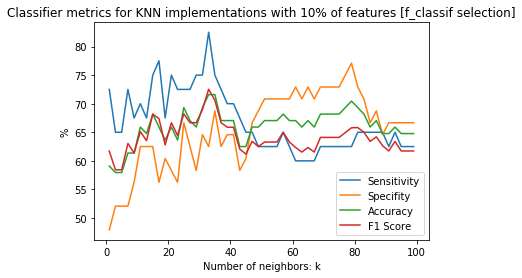

In [23]:
np_stats = np.array(stats_knn_p10)
plt.plot(np_stats[:,0], 100*np_stats[:,5], label="Sensitivity")
plt.plot(np_stats[:,0], 100*np_stats[:,6], label="Specifity")
plt.plot(np_stats[:,0], 100*np_stats[:,7], label="Accuracy")
plt.plot(np_stats[:,0], 100*np_stats[:,9], label="F1 Score")
plt.xlabel("Number of neighbors: k")
plt.ylabel("%")
plt.title("Classifier metrics for KNN implementations with 10% of features [f_classif selection]")
# plt.xlim((0,50))
plt.legend()

In [24]:
top5k_p10_acc = np.argpartition(np_stats[:,7], -5)[-5:]
print(np_stats[top5k_p10_acc,0])
print(np_stats[top5k_p10_acc,7])

[77. 81. 79. 33. 35.]
[0.69318182 0.69318182 0.70454545 0.71590909 0.71590909]


385.3

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors = 35)
sfs = SFS(knn, 
          k_features=385, #(int(x_train.shape[1]/10)))
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(x_train, y_train)

print('\nSequential Forward Selection (k=385):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=385):
(4, 7, 15, 28, 29, 30, 31, 36, 49, 68, 98, 100, 109, 113, 117, 122, 124, 127, 129, 131, 143, 145, 159, 170, 174, 212, 220, 225, 245, 253, 262, 277, 278, 282, 286, 293, 310, 323, 327, 329, 336, 346, 350, 366, 376, 384, 392, 396, 413, 437, 443, 448, 473, 475, 476, 482, 491, 493, 506, 530, 533, 544, 546, 550, 555, 566, 570, 571, 576, 579, 581, 620, 633, 636, 637, 657, 659, 662, 671, 676, 689, 690, 692, 704, 705, 707, 727, 762, 763, 769, 775, 777, 791, 814, 821, 826, 839, 860, 863, 864, 868, 877, 907, 918, 927, 938, 950, 952, 988, 991, 1005, 1025, 1052, 1058, 1073, 1085, 1092, 1093, 1109, 1112, 1136, 1150, 1177, 1200, 1207, 1214, 1240, 1242, 1248, 1264, 1266, 1269, 1279, 1302, 1305, 1322, 1336, 1346, 1348, 1371, 1372, 1384, 1386, 1388, 1403, 1417, 1418, 1422, 1423, 1428, 1438, 1439, 1461, 1471, 1476, 1489, 1504, 1506, 1519, 1525, 1568, 1572, 1590, 1614, 1619, 1632, 1643, 1651, 1677, 1680, 1681, 1686, 1691, 1696, 1712, 1713, 1714, 1741, 1743, 1758, 176

In [35]:
sfs_data = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [47]:
sfs_data.to_csv(path_or_buf="forward_feature_selection_knn.csv")

In [51]:
sfs_data

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.678977,0.0198501,"[0.6931818181818182, 0.6818181818181818, 0.659...","(839,)","(cg05512099,)",0.0123832,0.00714946
2,0.707386,0.052122,"[0.75, 0.6818181818181818, 0.6704545454545454,...","(692, 839)","(cg04630334, cg05512099)",0.0325157,0.0187729
3,0.735795,0.0838466,"[0.7840909090909091, 0.7159090909090909, 0.659...","(692, 839, 2360)","(cg04630334, cg05512099, cg16022555)",0.0523067,0.0301993
4,0.747159,0.0552134,"[0.7954545454545454, 0.7272727272727273, 0.704...","(692, 839, 2360, 3020)","(cg04630334, cg05512099, cg16022555, cg21376774)",0.0344442,0.0198864
5,0.755682,0.0610973,"[0.8068181818181818, 0.7386363636363636, 0.704...","(692, 839, 1207, 2360, 3020)","(cg04630334, cg05512099, cg07894846, cg1602255...",0.0381148,0.0220056
6,0.764205,0.0595503,"[0.8181818181818182, 0.75, 0.7159090909090909,...","(245, 692, 839, 1207, 2360, 3020)","(cg01763173, cg04630334, cg05512099, cg0789484...",0.0371497,0.0214484
7,0.767045,0.0663061,"[0.8295454545454546, 0.75, 0.7159090909090909,...","(245, 692, 839, 1207, 2360, 2420, 3020)","(cg01763173, cg04630334, cg05512099, cg0789484...",0.0413643,0.0238817
8,0.772727,0.0617724,"[0.8295454545454546, 0.75, 0.7272727272727273,...","(245, 293, 692, 839, 1207, 2360, 2420, 3020)","(cg01763173, cg02081905, cg04630334, cg0551209...",0.038536,0.0222488
9,0.772727,0.0576031,"[0.8181818181818182, 0.75, 0.7272727272727273,...","(245, 293, 692, 839, 1207, 2360, 2420, 3020, 3...","(cg01763173, cg02081905, cg04630334, cg0551209...",0.035935,0.0207471
10,0.772727,0.0576031,"[0.8181818181818182, 0.75, 0.7272727272727273,...","(245, 293, 692, 839, 1109, 1207, 2360, 2420, 3...","(cg01763173, cg02081905, cg04630334, cg0551209...",0.035935,0.0207471


In [52]:
x_train

,cg00009553,cg00017475,cg00018539,cg00019576,cg00019778,cg00027650,cg00039016,cg00040423,cg00042568,cg00049475,...,Macrophages.M2,Dendritic.cells.resting,Dendritic.cells.activated,Mast.cells.resting,Mast.cells.activated,Eosinophils,Neutrophils,P.value,Correlation,RMSE
NS047BC,0.364551,0.837109,0.866511,0.882094,0.045116,0.626384,0.821088,0.041608,0.129566,0.813178,...,0.000000,0.210559,0.067885,0.054929,0.000000,0.000000,0.027933,0.00,0.285122,0.974674
NS007BC,0.265829,0.822958,0.831262,0.755286,0.048733,0.696751,0.860567,0.040988,0.106027,0.838433,...,0.000000,0.237989,0.036224,0.058870,0.000000,0.005328,0.034056,0.00,0.293044,0.975166
E028BC,0.612027,0.889197,0.852238,0.947260,0.046290,0.602360,0.861875,0.052118,0.099170,0.795960,...,0.000000,0.066424,0.000000,0.000000,0.064095,0.000000,0.027667,0.00,0.282364,0.998295
E065LY,0.588491,0.882635,0.876857,0.980611,0.038022,0.617290,0.872348,0.042892,0.096497,0.811616,...,0.000000,0.227663,0.063816,0.062278,0.000000,0.000000,0.000000,0.01,0.198838,1.011432
NS068BC,0.312780,0.820930,0.873718,0.759489,0.047778,0.655820,0.864674,0.037840,0.082471,0.847603,...,0.000000,0.286337,0.000000,0.064478,0.000000,0.000000,0.024663,0.00,0.257843,0.990453
NS014BC,0.357521,0.836657,0.827337,0.830815,0.046225,0.657383,0.842168,0.040988,0.102787,0.806090,...,0.000000,0.095960,0.000000,0.063111,0.000000,0.000000,0.013783,0.00,0.436246,0.915067
NS050LY,0.558741,0.837642,0.907960,0.983875,0.044077,0.572022,0.859544,0.049995,0.119900,0.793472,...,0.000000,0.132658,0.114424,0.072954,0.000000,0.000000,0.001993,0.00,0.292433,0.973318
NS268LY,0.533214,0.866841,0.840147,0.960910,0.043166,0.636662,0.863426,0.038453,0.106998,0.761257,...,0.000000,0.194939,0.090513,0.087593,0.000000,0.000000,0.054767,0.00,0.264893,0.982476
NS420LY,0.583788,0.857103,0.828519,0.892530,0.048828,0.642147,0.859735,0.038620,0.082749,0.794730,...,0.000000,0.202829,0.122480,0.042853,0.000000,0.000000,0.018571,0.01,0.197385,1.009218
NS055BC,0.376048,0.807653,0.820776,0.921542,0.055823,0.520671,0.888653,0.044686,0.107130,0.825862,...,0.000000,0.171614,0.045747,0.073396,0.000000,0.000000,0.070684,0.00,0.258966,0.984869


In [53]:
knn = KNeighborsClassifier(n_neighbors = 35)
sfs2 = SFS(knn, 
          k_features=385, #(int(x_train.shape[1]/10)))
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=10,
          n_jobs=-1)
sfs2 = sfs2.fit(x_train, y_train)

print('\nSequential Forward Selection (k=385):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1361 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 2493 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 3853 out of 3853 | elapsed:   46.9s finished

[2018-11-29 10:38:55] Features: 1/385 -- score: 0.6876190476190476[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 3852 out of 3852 | elapsed:   42.7s finished

[2018-11-29 10:39:38] Features: 2/385 -- score: 0.7184126984126984[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 2520 

[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 3834 out of 3834 | elapsed:  1.0min finished

[2018-11-29 10:54:01] Features: 20/385 -- score: 0.7697619047619048[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 3833 out of 3833 | elapsed:   51.0s finished

[2018-11-29 10:54:52] Features: 21/385 -- score: 0.766904761904762[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 383

[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 3810 out of 3817 | elapsed:   57.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 3817 out of 3817 | elapsed:   57.6s finished

[2018-11-29 11:09:48] Features: 37/385 -- score: 0.7696825396825397[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 3816 out of 3816 | elapsed:  1.2min finished

[2018-11-29 11:11:00] Features: 38/385 -- score: 0.766904761904762[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   11.8s
[Parallel(n_

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3802 out of 3802 | elapsed:  1.5min finished

[2018-11-29 11:28:28] Features: 52/385 -- score: 0.7640476190476191[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3794 out of 3801 | elapsed:  1.4min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3801 out of 3801 | elapsed:  1.4min finished

[2018-11-29 11

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3788 out of 3788 | elapsed:  1.5min finished

[2018-11-29 11:47:45] Features: 66/385 -- score: 0.763968253968254[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 3780 out of 3787 | elapsed:  1.1min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 3787 out of 3787 | elapsed:  1.1min finished

[2018-11-29 11:48:51] Features: 67/385 -- score: 0.7582539682539682[Parallel(

[2018-11-29 12:05:18] Features: 80/385 -- score: 0.763968253968254[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3766 out of 3773 | elapsed:  1.4min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3773 out of 3773 | elapsed:  1.4min finished

[2018-11-29 12:06:45] Features: 81/385 -- score: 0.7668253968253969[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: 


[2018-11-29 12:27:49] Features: 94/385 -- score: 0.7640476190476191[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2934 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3752 out of 3759 | elapsed:  1.9min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3759 out of 3759 | elapsed:  1.9min finished

[2018-11-29 12:29:45] Features: 95/385 -- score: 0.7640476190476191[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]:

[2018-11-29 12:49:54] Features: 108/385 -- score: 0.7612698412698413[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3738 out of 3745 | elapsed:  1.4min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3745 out of 3745 | elapsed:  1.4min finished

[2018-11-29 12:51:15] Features: 109/385 -- score: 0.7584126984126984[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)

[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3724 out of 3731 | elapsed:  1.5min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3731 out of 3731 | elapsed:  1.5min finished

[2018-11-29 13:11:28] Features: 123/385 -- score: 0.7556349206349207[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3730 out of 3730 | elapsed:  1.5min finished

[2018-11-29 13:12:56] Features: 124/385 -- score: 0.7556349206349207[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   19.2s
[Parallel


[2018-11-29 13:33:19] Features: 137/385 -- score: 0.7557142857142857[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3716 out of 3716 | elapsed:  1.6min finished

[2018-11-29 13:34:53] Features: 138/385 -- score: 0.7585714285714286[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3708 out of

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3702 out of 3702 | elapsed:  1.9min finished

[2018-11-29 14:01:24] Features: 152/385 -- score: 0.7643650793650794[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      |

[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3688 out of 3688 | elapsed:  1.9min finished

[2018-11-29 14:29:08] Features: 166/385 -- score: 0.7670634920634921[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3680 out of 3687 | elapsed:  2.0min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3687 out of 3687 | elapsed:  2.0min finished

[2018-11-29 14:31:08] Features: 167/385 -- score: 0.7670634920634921[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.3s
[Parall


[2018-11-29 14:56:50] Features: 179/385 -- score: 0.7641269841269842[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3674 out of 3674 | elapsed:  2.2min finished

[2018-11-29 14:59:04] Features: 180/385 -- score: 0.7642063492063492[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks  

[Parallel(n_jobs=-1)]: Done 3663 out of 3663 | elapsed:  3.2min finished

[2018-11-29 15:31:33] Features: 191/385 -- score: 0.752936507936508[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3662 out of 3662 | elapsed:  3.2min finished

[2018-11-29 15:34:44] Features: 192/385 -- score: 0.7557142857142857[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 35

[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3651 out of 3651 | elapsed:  2.9min finished

[2018-11-29 16:07:56] Features: 203/385 -- score: 0.7557936507936509[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3650 out of 3650 | elapsed:  2.9min finished

[2018-11-29 16:10:49] Features: 204/385 -- score: 0.7613492063492064[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3639 out of 3639 | elapsed:  4.1min finished

[2018-11-29 16:46:22] Features: 215/385 -- score: 0.7499206349206349[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks     

[2018-11-29 17:29:28] Features: 226/385 -- score: 0.75[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3627 out of 3627 | elapsed:  3.5min finished

[2018-11-29 17:33:01] Features: 227/385 -- score: 0.7528571428571429[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3616 out of 3616 | elapsed:  3.1min finished

[2018-11-29 18:12:18] Features: 238/385 -- score: 0.7471428571428571[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3615 out of 3615 | elapsed:  2.9min finished

[2018-11-29 18:15:13] Features: 239/385 -- score: 0.7471428571428571[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3604 out of 3604 | elapsed:  3.5min finished

[2018-11-29 18:47:42] Features: 250/385 -- score: 0.7527777777777778[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks     

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3592 out of 3592 | elapsed:  3.6min finished

[2018-11-29 19:35:50] Features: 262/385 -- score: 0.749920634920635[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | e

[Parallel(n_jobs=-1)]: Done 3581 out of 3581 | elapsed:  2.7min finished

[2018-11-29 20:13:50] Features: 273/385 -- score: 0.7614285714285715[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3580 out of 3580 | elapsed:  2.8min finished

[2018-11-29 20:16:36] Features: 274/385 -- score: 0.7642857142857143[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 3

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3569 out of 3569 | elapsed:  4.8min finished

[2018-11-29 20:58:29] Features: 285/385 -- score: 0.7501587301587301[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3568 out of 356

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3557 out of 3557 | elapsed:  5.4min finished

[2018-11-29 21:58:08] Features: 297/385 -- score: 0.753015873015873[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | e

[Parallel(n_jobs=-1)]: Done 3546 out of 3546 | elapsed:  4.4min finished

[2018-11-29 22:49:34] Features: 308/385 -- score: 0.7557936507936509[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 3545 out of 3545 | elapsed: 39.8min finished

[2018-11-29 23:29:24] Features: 309/385 -- score: 0.7557936507936509[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 3

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3534 out of 3534 | elapsed:  3.0min finished

[2018-11-30 00:02:12] Features: 320/385 -- score: 0.7470634920634922[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3533 out of 353

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3522 out of 3522 | elapsed:  3.7min finished

[2018-11-30 00:40:12] Features: 332/385 -- score: 0.7641269841269842[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | 

[Parallel(n_jobs=-1)]: Done 3511 out of 3511 | elapsed:  3.7min finished

[2018-11-30 01:20:25] Features: 343/385 -- score: 0.7670634920634921[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3510 out of 3510 | elapsed:  3.6min finished

[2018-11-30 01:24:00] Features: 344/385 -- score: 0.7642063492063492[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 3

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3499 out of 3499 | elapsed:  3.9min finished

[2018-11-30 02:06:47] Features: 355/385 -- score: 0.7528571428571429[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3498 out of 349

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3487 out of 3487 | elapsed:  4.0min finished

[2018-11-30 02:54:35] Features: 367/385 -- score: 0.7583333333333334[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | 

[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3476 out of 3476 | elapsed:  4.5min finished

[2018-11-30 03:40:11] Features: 378/385 -- score: 0.7528571428571429[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3475 out of 3475 | elapsed:  4.2min finished

[2018-11-30 03:44:26] Features: 379/385 -- score: 0.7471428571428571[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 


Sequential Forward Selection (k=385):
(4, 7, 15, 28, 29, 30, 31, 36, 49, 68, 98, 100, 109, 113, 117, 122, 124, 127, 129, 131, 143, 145, 159, 170, 174, 212, 220, 225, 245, 253, 262, 277, 278, 282, 286, 293, 310, 323, 327, 329, 336, 346, 350, 366, 376, 384, 392, 396, 413, 437, 443, 448, 473, 475, 476, 482, 491, 493, 506, 530, 533, 544, 546, 550, 555, 566, 570, 571, 576, 579, 581, 620, 633, 636, 637, 657, 659, 662, 671, 676, 689, 690, 692, 704, 705, 707, 727, 762, 763, 769, 775, 777, 791, 814, 821, 826, 839, 860, 863, 864, 868, 877, 907, 918, 927, 938, 950, 952, 988, 991, 1005, 1025, 1052, 1058, 1073, 1085, 1092, 1093, 1109, 1112, 1136, 1150, 1177, 1200, 1207, 1214, 1240, 1242, 1248, 1264, 1266, 1269, 1279, 1302, 1305, 1322, 1336, 1346, 1348, 1371, 1372, 1384, 1386, 1388, 1403, 1417, 1418, 1422, 1423, 1428, 1438, 1439, 1461, 1471, 1476, 1489, 1504, 1506, 1519, 1525, 1568, 1572, 1590, 1614, 1619, 1632, 1643, 1651, 1677, 1680, 1681, 1686, 1691, 1696, 1712, 1713, 1714, 1741, 1743, 1758, 176


[2018-11-30 04:09:11] Features: 385/385 -- score: 0.7470634920634922

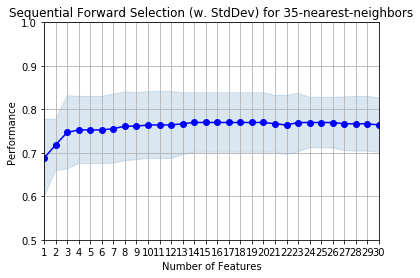

In [59]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.xlim([1,30])
plt.title('Sequential Forward Selection (w. StdDev) for 35-nearest-neighbors')
plt.grid()
plt.show()

In [66]:
sfs_data = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfs_data.iloc[[13]]['feature_names']

14    (cg02081905, cg02553663, cg03902951, cg0463033...
Name: feature_names, dtype: object

In [85]:
final_features = list(list(sfs_data.iloc[[13]]['feature_names'])[0])
x_train_reduced = x_train[final_features]
x_test_reduced = x_test[final_features]
x_test_reduced

,cg02081905,cg02553663,cg03902951,cg04630334,cg05512099,cg09179008,cg09704422,cg10715527,cg14556815,cg15730213,cg16337542,cg16810449,cg18829186,cg25134515
E060LY,0.004056,0.001914,0.003860,0.333804,0.408632,0.003032,0.001091,0.872304,0.015970,0.009184,0.012223,0.004157,0.009913,0.073993
E077LY,0.004955,0.008796,0.001615,0.726174,0.348084,0.002131,0.001185,0.865192,0.012402,0.010978,0.011492,0.002984,0.005050,0.005783
NS212LY,0.004180,0.002664,0.001743,0.809286,0.363742,0.003714,0.002242,0.874565,0.011054,0.008244,0.015289,0.002921,0.004567,0.003288
E053BC,0.006244,0.002301,0.004456,0.693071,0.437774,0.000337,0.002129,0.879171,0.017559,0.007765,0.014327,0.002864,0.008401,0.006273
E064LY,0.008596,0.000158,0.006342,0.760517,0.406457,0.003578,0.001479,0.903209,0.021836,0.008935,0.006679,0.001141,0.010690,0.001812
E071BC,0.005670,0.006482,0.002264,0.777507,0.487879,0.001181,0.001030,0.870835,0.016856,0.009944,0.009696,0.001232,0.000754,0.005066
NS253LY,0.006681,0.002796,0.002532,0.765304,0.368084,0.002151,0.005937,0.839001,0.015143,0.008358,0.007918,0.003424,0.005390,0.002600
NS193LY,0.003250,0.000723,0.003011,0.790638,0.447306,0.002163,0.001647,0.863461,0.018345,0.008061,0.017274,0.003942,0.007489,0.002617
NS151LY,0.005414,0.004683,0.000425,0.793434,0.412102,0.002852,0.001632,0.883147,0.012564,0.002292,0.019354,0.001773,0.005930,0.003095
E049LY,0.005723,0.001927,0.003070,0.805042,0.387772,0.001003,0.003209,0.897652,0.016428,0.008959,0.013197,0.002353,0.007940,0.001330


In [87]:
model = KNeighborsClassifier(n_neighbors = 35)
model.fit(x_train_reduced.values, y_train.values)
y_predicted = model.predict(x_test_reduced.values)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
#sensitivity = recall
s = tp / (tp+fn)
#specificity
sp = tn / (tn+fp)
#accuracy
a = (tp+tn) / (tp+tn+fp+fn)
#precision = positive predictive value
p = tp / (tp+fp)
#f1-score
f1 = (2*tp)/ (2*tp + fp + fn)
stats = [tn, fp, fn, tp, s, sp, a, p, f1]
stats

[30,
 18,
 12,
 28,
 0.7,
 0.625,
 0.6590909090909091,
 0.6086956521739131,
 0.6511627906976745]

In [95]:
import csv
with open("final_features_knn.csv",'w') as resultFile:
    wr = csv.writer(resultFile)
    wr.writerow(final_features)